In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
import seaborn as sns
import warnings
import gcsfs
fs = gcsfs.GCSFileSystem()

# Overview of CMIP6-testbed files

This notebook shows the file structure of the CMIP6-testbed and reconstructions of surface ocean pCO2 for four sub-sampling experiments. 

The experiments:

-LR-2yr_masked: 

-LR-2yr_unmasked: 

-LR-41yr: 

-LR-41yr-collapsed: 

For users of the LEAP Pangeo platforms, files can be accessed from the LEAP Pangeo cloud storage.

The same files are  publicly accessible on the Open Storage Network (OSN) pod.

## Paths for the LEAP Pangeo cloud storage:

cmip6-testbed: f'gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs'

LR-2yr_masked: f"gs://leap-persistent/hatlenheimdalthea/pco2_residual_testbed_2020-2021/post02_xgb_2020-2022/reconstructions"

LR-2yr_unmasked:f"gs://leap-persistent/hatlenheimdalthea/pco2_residual_testbed_2020-2021_unmasked/post02_xgb_2020-2022/reconstructions"

LR-41yr: f"gs://leap-persistent/abbysh/pco2_gridsearch_1982-2022/post02_xgb_1982-2022_nmse_outputs/reconstructions"

LR-41yr-collapsed: f"gs://leap-persistent/hatlenheimdalthea/pco2_residual_testbed_2020-2021_collapsed/post02_xgb_2020-2022/reconstructions"

### How to search the LEAP cloud storage

This shows the overview of the different ESMs of the testbed

In [19]:
fs.ls('gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs')

['leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/ACCESS-ESM1-5',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2-WACCM',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CMCC-ESM2',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CanESM5',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CanESM5-CanOE',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/GFDL-ESM4',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/MPI-ESM1-2-LR',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/UKESM1-0-LL']

This shows the overview of the different members per ESM, in this example CESM2

In [20]:
fs.ls('gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2')

['leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2/member_r10i1p1f1',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2/member_r11i1p1f1',
 'leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2/member_r4i1p1f1']

There is one pickle file for each member of the CMIP6-testbed

In [21]:
fs.ls('gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2/member_r10i1p1f1')

['leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2/member_r10i1p1f1/MLinput_CESM2_r10i1p1f1_mon_1x1_198202_202212.pkl']

### Example of how to open testbed files

In [23]:
CESM2_r10i1p1f1 = pd.read_pickle('gs://leap-persistent/abbysh/pco2_all_members_1982-2022/post01_xgb_inputs/CESM2/member_r10i1p1f1/MLinput_CESM2_r10i1p1f1_mon_1x1_198202_202212.pkl')
DS = CESM2_r10i1p1f1.to_xarray()

Each pickle file contains the target variable (surface ocean pCO2 or pco2-residual) and associated driver variables (e.g., sss, sst)

In [24]:
CESM2_r10i1p1f1

key_0        sss       sst        mld           chl  \
time       xlon   ylat                                                         
1982-02-01 -179.5 -89.5      2        NaN       NaN        NaN           NaN   
                  -88.5      2        NaN       NaN        NaN           NaN   
                  -87.5      2        NaN       NaN        NaN           NaN   
                  -86.5      2        NaN       NaN        NaN           NaN   
                  -85.5      2        NaN       NaN        NaN           NaN   
...                        ...        ...       ...        ...           ...   
2022-12-01  179.5  85.5     12  31.118666 -1.737990  60.619244  1.099464e-08   
                   86.5     12  31.158457 -1.740286  59.425194  1.110069e-08   
                   87.5     12  31.223166 -1.744014  58.660351  1.129281e-08   
                   88.5     12  31.304031 -1.748679  59.220295  1.150984e-08   
                   89.5     12  31.390146 -1.753622  60.720844  1.168846e-08   

                         pco2_residual       spco2  socat_mask       chl_sat  \
time       xlon   ylat                                                         
1982-02-01 -179.5 -89.5            NaN         NaN         0.0           NaN   
                  -88.5            NaN         NaN         0.0           NaN   
                  -87.5            NaN         NaN         0.0           NaN   
                  -86.5            NaN         NaN         0.0           NaN   
                  -85.5            NaN         NaN         0.0           NaN   
...                                ...         ...         ...           ...   
2022-12-01  179.5  85.5      48.001964  366.232397         0.0  1.099464e-08   
                   86.5      48.416903  366.842711         0.0  1.110069e-08   
                   87.5      49.289882  367.766860         0.0  1.129281e-08   
                   88.5      50.424802  368.631148         0.0  1.150984e-08   
                   89.5      51.537055  369.061278         0.0  1.168846e-08   

                          mld_log  ...  chl_sat_anom  sss_anom  sst_anom  \
time       xlon   ylat             ...                                     
1982-02-01 -179.5 -89.5       NaN  ...           NaN       NaN       NaN   
                  -88.5       NaN  ...           NaN       NaN       NaN   
                  -87.5       NaN  ...           NaN       NaN       NaN   
                  -86.5       NaN  ...           NaN       NaN       NaN   
                  -85.5       NaN  ...           NaN       NaN       NaN   
...                           ...  ...           ...       ...       ...   
2022-12-01  179.5  85.5  1.782611  ...     -0.010233 -2.733137  0.009484   
                   86.5  1.773971  ...     -0.011085 -2.693346  0.008810   
                   87.5  1.768345  ...     -0.008444 -2.628637  0.007128   
                   88.5  1.772471  ...     -0.004182 -2.547771  0.005097   
                   89.5  1.783338  ...     -0.000422 -2.461657  0.003539   

                               T0        T1         A         B         C  \
time       xlon   ylat                                                      
1982-02-01 -179.5 -89.5  0.852078  0.523416 -0.999962 -0.000076  0.008726   
                  -88.5  0.852078  0.523416 -0.999657 -0.000228  0.026176   
                  -87.5  0.852078  0.523416 -0.999048 -0.000381  0.043618   
                  -86.5  0.852078  0.523416 -0.998135 -0.000533  0.061046   
                  -85.5  0.852078  0.523416 -0.996917 -0.000685  0.078456   
...                           ...       ...       ...       ...       ...   
2022-12-01  179.5  85.5  0.869589 -0.493776  0.996917  0.000685  0.078456   
                   86.5  0.869589 -0.493776  0.998135  0.000533  0.061046   
                   87.5  0.869589 -0.493776  0.999048  0.000381  0.043618   
                   88.5  0.869589 -0.493776  0.999657  0.000228  0.026176   
                   89.5  0.869

### Example of how to open pCO2 reconstruction files

In [30]:
reconstruction_CESM_r10i1p1f1_Exp_LR_2yr_masked = xr.open_dataset('gs://leap-persistent/hatlenheimdalthea/pco2_residual_testbed_2020-2021/post02_xgb_2020-2022/reconstructions/CESM2/member_r10i1p1f1/recon_pCO2_CESM2_member_r10i1p1f1_mon_1x1_202002_202201.zarr', engine="zarr")

In [31]:
reconstruction_CESM_r10i1p1f1_Exp_LR_2yr_masked

<xarray.Dataset> Size: 50MB
Dimensions:            (time: 24, ylat: 180, xlon: 360)
Coordinates:
  * time               (time) datetime64[ns] 192B 2020-02-01 ... 2022-01-01
  * xlon               (xlon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * ylat               (ylat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    pCO2_recon_full    (time, ylat, xlon) float64 12MB ...
    pCO2_recon_test    (time, ylat, xlon) float64 12MB ...
    pCO2_recon_train   (time, ylat, xlon) float64 12MB ...
    pCO2_recon_unseen  (time, ylat, xlon) float64 12MB ...

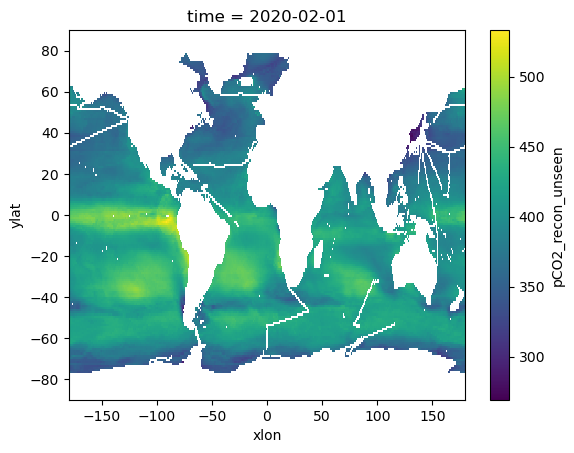

In [33]:
reconstruction_CESM_r10i1p1f1_Exp_LR_2yr_masked.pCO2_recon_unseen[0,:,:].plot()

## Paths for the OSN pod:

cmip6-testbed: https://nyu1.osn.mghpcc.org/leap-pangeo-manual/pco2_all_members_1982-2022/post01_xgb_inputs

LR-2yr_masked: https://nyu1.osn.mghpcc.org/leap-pubs/hatlenheimdalthea/pco2_residual_testbed_2020-2021/post02_xgb_2020-2022/reconstructions

LR-2yr_unmasked: https://nyu1.osn.mghpcc.org/leap-pubs/hatlenheimdalthea/pco2_residual_testbed_2020-2021_unmasked/post02_xgb_2020-2022/reconstructions

LR-41yr: https://nyu1.osn.mghpcc.org/leap-pubs/abbysh/pco2_gridsearch_1982-2022/post02_xgb_1982-2022_nmse_outputs/reconstructions

LR-41yr-collapsed: https://nyu1.osn.mghpcc.org/leap-pubs/hatlenheimdalthea/pco2_residual_testbed_2020-2021_collapsed/post02_xgb_2020-2022/reconstructions

### Example: open testbed pickle file from the OSN pod

This is member r5i1p1f1 from the ACCESS-ESM1-5 model

In [40]:
ACCESS_r4i1p1f1 = pd.read_pickle('https://nyu1.osn.mghpcc.org/leap-pangeo-manual/pco2_all_members_1982-2022/post01_xgb_inputs/ACCESS-ESM1-5/member_r5i1p1f1/MLinput_ACCESS-ESM1-5_r5i1p1f1_mon_1x1_198202_202212.pkl')

In [41]:
ACCESS_r4i1p1f1

key_0        sss       sst        mld           chl  \
time       xlon   ylat                                                         
1982-02-01 -179.5 -89.5      2        NaN       NaN        NaN           NaN   
                  -88.5      2        NaN       NaN        NaN           NaN   
                  -87.5      2        NaN       NaN        NaN           NaN   
                  -86.5      2        NaN       NaN        NaN           NaN   
                  -85.5      2        NaN       NaN        NaN           NaN   
...                        ...        ...       ...        ...           ...   
2022-12-01  179.5  85.5     12  30.289404 -1.642834  38.155647  3.539034e-09   
                   86.5     12  30.355947 -1.645754  37.504375  3.281063e-09   
                   87.5     12  30.429890 -1.649851  36.272945  3.132230e-09   
                   88.5     12  30.458961 -1.651764  35.487919  3.154929e-09   
                   89.5     12  30.455643 -1.651590  35.934330  3.218113e-09   

                         pco2_residual       spco2  socat_mask       chl_sat  \
time       xlon   ylat                                                         
1982-02-01 -179.5 -89.5            NaN         NaN         0.0           NaN   
                  -88.5            NaN         NaN         0.0           NaN   
                  -87.5            NaN         NaN         0.0           NaN   
                  -86.5            NaN         NaN         0.0           NaN   
                  -85.5            NaN         NaN         0.0           NaN   
...                                ...         ...         ...           ...   
2022-12-01  179.5  85.5      35.301782  326.444982         0.0  3.539034e-09   
                   86.5      33.974696  326.129039         0.0  3.281063e-09   
                   87.5      34.471312  327.620545         0.0  3.132230e-09   
                   88.5      34.981230  329.109077         0.0  3.154929e-09   
                   89.5      35.447174  330.349734         0.0  3.218113e-09   

                          mld_log  ...  chl_sat_anom  sss_anom  sst_anom  \
time       xlon   ylat             ...                                     
1982-02-01 -179.5 -89.5       NaN  ...           NaN       NaN       NaN   
                  -88.5       NaN  ...           NaN       NaN       NaN   
                  -87.5       NaN  ...           NaN       NaN       NaN   
                  -86.5       NaN  ...           NaN       NaN       NaN   
                  -85.5       NaN  ...           NaN       NaN       NaN   
...                           ...  ...           ...       ...       ...   
2022-12-01  179.5  85.5  1.581559  ...     -0.190921 -3.757555  0.037761   
                   86.5  1.574082  ...     -0.211108 -3.691011  0.036799   
                   87.5  1.559583  ...     -0.218723 -3.617069  0.034752   
                   88.5  1.550081  ...     -0.207241 -3.587997  0.034659   
                   89.5  1.555510  ...     -0.192713 -3.591316  0.036619   

                               T0        T1         A         B         C  \
time       xlon   ylat                                                      
1982-02-01 -179.5 -89.5  0.852078  0.523416 -0.999962 -0.000076  0.008726   
                  -88.5  0.852078  0.523416 -0.999657 -0.000228  0.026176   
                  -87.5  0.852078  0.523416 -0.999048 -0.000381  0.043618   
                  -86.5  0.852078  0.523416 -0.998135 -0.000533  0.061046   
                  -85.5  0.852078  0.523416 -0.996917 -0.000685  0.078456   
...                           ...       ...       ...       ...       ...   
2022-12-01  179.5  85.5  0.869589 -0.493776  0.996917  0.000685  0.078456   
                   86.5  0.869589 -0.493776  0.998135  0.000533  0.061046   
                   87.5  0.869589 -0.493776  0.999048  0.000381  0.043618   
                   88.5  0.869589 -0.493776  0.999657  0.000228  0.026176   
                   89.5  0.869

### Example: open pCO2 reconstruction Zarr file from the OSN pod

In [38]:
reconstruction_ACCESS_r4i1p1f1_Exp_LR_2yr_masked = xr.open_dataset('https://nyu1.osn.mghpcc.org/leap-pubs/hatlenheimdalthea/pco2_residual_testbed_2020-2021/post02_xgb_2020-2022/reconstructions/ACCESS-ESM1-5/member_r4i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r4i1p1f1_mon_1x1_202002_202201.zarr', engine='zarr')

In [39]:
reconstruction_ACCESS_r4i1p1f1_Exp_LR_2yr_masked

<xarray.Dataset> Size: 50MB
Dimensions:            (time: 24, ylat: 180, xlon: 360)
Coordinates:
  * time               (time) datetime64[ns] 192B 2020-02-01 ... 2022-01-01
  * xlon               (xlon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * ylat               (ylat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    pCO2_recon_full    (time, ylat, xlon) float64 12MB ...
    pCO2_recon_test    (time, ylat, xlon) float64 12MB ...
    pCO2_recon_train   (time, ylat, xlon) float64 12MB ...
    pCO2_recon_unseen  (time, ylat, xlon) float64 12MB ...